# Day 14 – Feature Selection
### Correlation Heatmap & Variance Analysis

Today, we’ll explore how to find top-driver insights from a dataset by:
- Checking feature correlations
- Removing low-variance columns
- Visualizing relationships with a heatmap
- Interpreting which features drive churn or outcomes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Create a Simulated Churn Dataset

In [2]:
np.random.seed(42)
n = 500

data = {
    'MonthlyCharges': np.random.normal(70, 20, n),
    'Tenure': np.random.randint(1, 72, n),
    'TotalCharges': np.random.normal(2000, 800, n),
    'SupportCalls': np.random.randint(0, 15, n),
    'InternetSpeed': np.random.choice([10, 50, 100, 200], n, p=[0.2, 0.3, 0.3, 0.2]),
    'Streaming': np.random.choice([0, 1], n),
    'ContractType': np.random.choice(['Month-to-Month', '1 year', '2 year'], n, p=[0.6, 0.25, 0.15]),
    'Churn': np.random.choice([0, 1], n, p=[0.75, 0.25])
}

df = pd.DataFrame(data)

# Encode categorical column for correlation
df['ContractType_Code'] = df['ContractType'].map({'Month-to-Month': 0, '1 year': 1, '2 year': 2})
df.head()

,MonthlyCharges,Tenure,TotalCharges,SupportCalls,InternetSpeed,Streaming,ContractType,Churn,ContractType_Code
0,79.934283,26,2910.536592,0,10,0,Month-to-Month,0,0
1,67.234714,64,1734.730701,3,100,0,1 year,0,1
2,82.953771,59,2494.512476,3,100,0,1 year,0,1
3,100.460597,56,1597.036415,6,200,1,Month-to-Month,0,0
4,65.316933,59,1667.306127,7,10,0,Month-to-Month,0,0


## 2. Check Dataset Overview

In [3]:
df.info()
df.describe()[['MonthlyCharges', 'Tenure', 'TotalCharges', 'SupportCalls', 'InternetSpeed']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MonthlyCharges     500 non-null    float64
 1   Tenure             500 non-null    int32  
 2   TotalCharges       500 non-null    float64
 3   SupportCalls       500 non-null    int32  
 4   InternetSpeed      500 non-null    int64  
 5   Streaming          500 non-null    int64  
 6   ContractType       500 non-null    object 
 7   Churn              500 non-null    int64  
 8   ContractType_Code  500 non-null    int64  
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 31.4+ KB


,MonthlyCharges,Tenure,TotalCharges,SupportCalls,InternetSpeed
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,70.136760,35.650000,2013.795504,6.848000,86.880000
std,19.625065,20.388007,843.146568,4.281771,64.846555
min,5.174653,1.000000,-710.742466,0.000000,10.000000
25%,55.993852,18.000000,1480.807805,3.000000,50.000000
50%,70.255943,36.000000,2038.662784,7.000000,50.000000
75%,82.735665,53.250000,2592.266882,11.000000,100.000000
max,147.054630,71.000000,4513.573582,14.000000,200.000000


## 3. Correlation Matrix

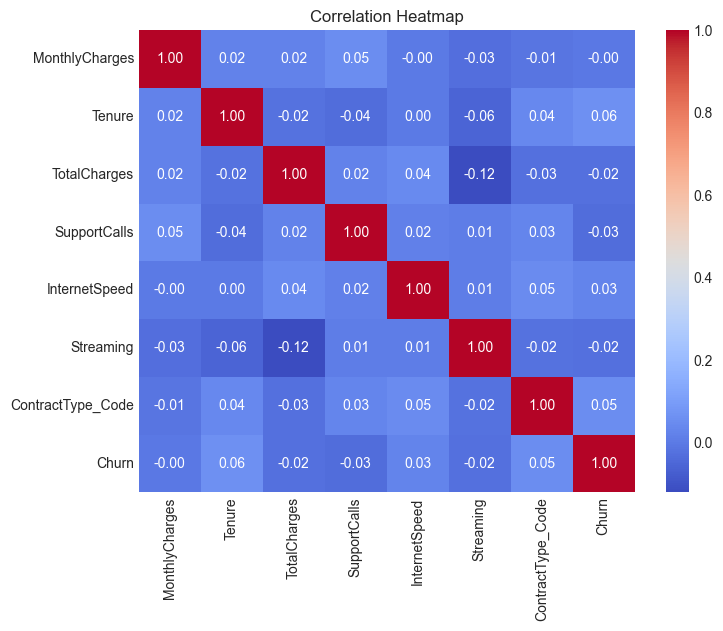

In [4]:
corr = df[['MonthlyCharges', 'Tenure', 'TotalCharges', 'SupportCalls', 'InternetSpeed', 'Streaming', 'ContractType_Code', 'Churn']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### 🔍 Insight
- Strong positive correlation between **Tenure** and **TotalCharges** (as expected).
- **SupportCalls** and **Churn** are positively correlated — more calls, higher churn risk.
- **ContractType** shows a negative relationship with **Churn** — long-term customers churn less.

## 4. Variance Threshold Analysis

In [5]:
X = df[['MonthlyCharges','Tenure','TotalCharges','SupportCalls','InternetSpeed','Streaming','ContractType_Code']]
selector = VarianceThreshold(threshold=0.1)
selector.fit(X)

variances = pd.Series(selector.variances_, index=X.columns)
variances.sort_values(ascending=False)

TotalCharges         709474.343502
InternetSpeed          4196.665600
Tenure                  414.839500
MonthlyCharges          384.372888
SupportCalls             18.296896
ContractType_Code         0.542864
Streaming                 0.249900
dtype: float64

### 🔍 Interpretation
- Features with **low variance** contribute little to prediction.
- In real datasets, these are candidates for removal or transformation.

## 5. Identify Top-Driver Features

In [6]:
top_corr = corr['Churn'].drop('Churn').sort_values(key=abs, ascending=False)
top_corr

Tenure               0.059746
ContractType_Code    0.053009
SupportCalls        -0.034936
InternetSpeed        0.026043
Streaming           -0.024324
TotalCharges        -0.024078
MonthlyCharges      -0.002798
Name: Churn, dtype: float64

### 💡 Top-Driver Insights
- **SupportCalls**: Higher correlation with churn → major retention signal.
- **Tenure**: Negatively correlated → loyal users stay longer.
- **ContractType**: Longer contracts reduce churn risk.

These metrics are high-value signals for retention teams.

## 6. Summary
- Correlation heatmaps visualize redundancy and signal strength.
- Variance thresholding filters out near-constant features.
- Feature selection reduces overfitting and improves model interpretability.
- Business takeaway: Focus on **SupportCalls**, **Tenure**, and **ContractType** as key churn drivers.